# TP 2 Multitâches 
# Exercice 2 - Facteurs de nombres entiers

## Introduction

Cet exercice nécessite le package **Numba**. 

L'objectif est de paralléliser un algorithme par **multiprocessing** et **multithreading** à l'aide du module Python **concurrent.futures** et de comparer les performances obtenues.

In [63]:
import numpy as np
from numba import njit
import time
from concurrent.futures import ProcessPoolExecutor
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


La fonction `factor_01(n)` construit de façon naïve par compréhension la liste des différents facteurs entiers de `n` strictement inférieur à `n`.

In [1]:
def factor_01(n):
    """
    Retourner la liste des facteurs propres d'un entier n.
    """
    return [i for i in range(1, n) if n % i == 0]

La fonction `main(a, b)` construit par compréhension la liste de la somme de tous les facteurs de chaque nombre entier `n` compris entre `a` et `b` donnés en arguments du script.

In [4]:
def main(a, b):
    """
    Construire la liste des sommes des facteurs propres pour tous les entiers de a à b.
    """
    return [sum(factor_01(n)) for n in range(a, b + 1)]

## 1 - Préliminaires

1.a) Mesurer les temps d'exécution de `main` pour différentes valeurs de `a` et `b`

For 10 numbers, compute in 1.9311904907226562e-05 seconds
For 20 numbers, compute in 1.7642974853515625e-05 seconds
For 50 numbers, compute in 0.0001277923583984375 seconds
For 100 numbers, compute in 0.0002923011779785156 seconds
For 200 numbers, compute in 0.0008924007415771484 seconds
For 500 numbers, compute in 0.0055811405181884766 seconds
For 1000 numbers, compute in 0.024730682373046875 seconds


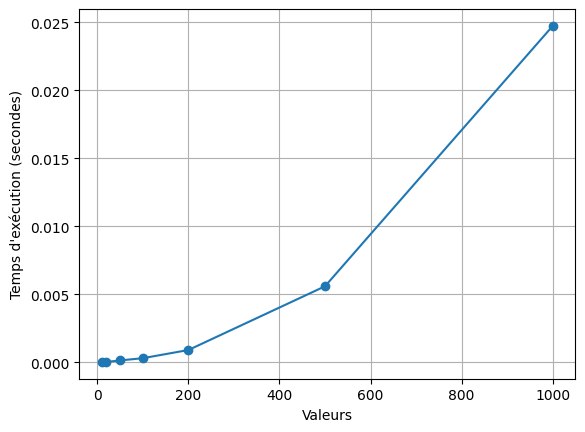

In [66]:
a_values = [1, 11, 21, 31, 41, 51, 101]
b_values = [10, 20 , 50, 100, 200, 500, 1000]

times = []

for i in range(len(a_values)):
    tic = time.time()
    mains = main(1, b_values[i])
    toc = time.time()
    elapsed_time = toc - tic 
    times.append(elapsed_time) 
    print(f'For {len(mains)} numbers, compute in {toc - tic} seconds')

# Plotando o gráfico
plt.plot(b_values, times, marker='o')
plt.xlabel('Valeurs')
plt.ylabel("Temps d'exécution (secondes)")
plt.grid(True)
plt.show()

1.b) Sur la base de `main`, écrire une fonction `main_map` afin d'utiliser la méthode `map` native de Python

In [56]:
def main_map(a, b):
    res = []
    result = [res for res in map(factor_01,list(range(a,b+1)))]
    for i in range(0,len(result)):
        res.append(sum(result[i]))
    # result = map(factor_01, list(range(a,b)))   
    return res


1.c) Mesurer les performances de cette nouvelle version

In [62]:
for i in range(len(a_values)):
    tic = time.time()
    mains = main_map(1, b_values[i])
    toc = time.time()
    print(f'For {len(mains)} numbers, compute in {toc - tic} seconds')

For 10 numbers, compute in 3.337860107421875e-05 seconds
For 20 numbers, compute in 2.1696090698242188e-05 seconds
For 50 numbers, compute in 7.05718994140625e-05 seconds
For 100 numbers, compute in 0.0002913475036621094 seconds
For 200 numbers, compute in 0.0009462833404541016 seconds
For 500 numbers, compute in 0.006916522979736328 seconds


## 2 - Multiprocessing

2.a) Sur la base de `main_map`, écrire une fonction `main_mp` qui dispatche les tâches effectuées par le `map` entre les différents processus d’un pool de `n` processus, `n` donné en argument de la fonction `main_mp`

In [ ]:
#TODO

2.b) Mesurer les performances pour un nombre différent de processus et des valeurs différentes de `a` et `b`

In [ ]:
#TODO

2.c) Utiliser le décorateur `njit` (sans activer le `nogil`) de `numba` sur la fonction `factor_01` et mesurer les performances (comparer avec une version *jittée* sans multiprocessing)

In [ ]:
#TODO

## 3 - Multithreading

3.a) Sur la base de `main_mp`, écrire une fonction `main_nt` qui utilise du multithreading à la place du multiprocessing

In [ ]:
#TODO

3.b) Mesurer les performances de cette version et les comparer aux versions précédentes

In [ ]:
#TODO

3.c) Activer le `nogil` dans le décorateur `njit` et comparer les performances

In [ ]:
#TODO